In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
# import numpy as np
# import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/survey lung cancer.csv')

In [ ]:
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
dataset.shape

(309, 16)

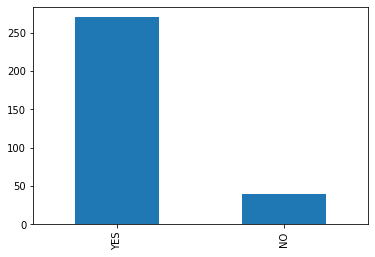

In [ ]:
dataset.LUNG_CANCER.value_counts()[0:30].plot(kind='bar')
plt.show()

In [ ]:
dataset.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
dataset=dataset.drop(columns=['SWALLOWING DIFFICULTY','YELLOW_FINGERS', 'ALCOHOL CONSUMING', 'WHEEZING'], axis=1)
dataset.head()

,GENDER,AGE,SMOKING,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,COUGHING,SHORTNESS OF BREATH,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,1,1,2,1,2,2,2,YES
1,M,74,2,1,1,2,2,2,1,2,2,YES
2,F,59,1,1,2,1,2,1,2,2,2,NO
3,M,63,2,2,1,1,1,1,1,1,2,NO
4,F,63,1,1,1,1,1,1,2,2,1,NO


In [ ]:
dataset.shape

(309, 12)

In [ ]:
#columnwise null values
dataset.isna().sum()

GENDER                 0
AGE                    0
SMOKING                0
ANXIETY                0
PEER_PRESSURE          0
CHRONIC DISEASE        0
FATIGUE                0
ALLERGY                0
COUGHING               0
SHORTNESS OF BREATH    0
CHEST PAIN             0
LUNG_CANCER            0
dtype: int64

In [ ]:
# remove null rows
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   GENDER               309 non-null    object
 1   AGE                  309 non-null    int64 
 2   SMOKING              309 non-null    int64 
 3   ANXIETY              309 non-null    int64 
 4   PEER_PRESSURE        309 non-null    int64 
 5   CHRONIC DISEASE      309 non-null    int64 
 6   FATIGUE              309 non-null    int64 
 7   ALLERGY              309 non-null    int64 
 8   COUGHING             309 non-null    int64 
 9   SHORTNESS OF BREATH  309 non-null    int64 
 10  CHEST PAIN           309 non-null    int64 
 11  LUNG_CANCER          309 non-null    object
dtypes: int64(10), object(2)
memory usage: 31.4+ KB


In [ ]:
X = dataset.iloc[ :,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10]].values
y = dataset.iloc[ :, -1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [ ]:
X

array([[1, 69, 1, ..., 2, 2, 2],
       [1, 74, 2, ..., 1, 2, 2],
       [0, 59, 1, ..., 2, 2, 2],
       ...,
       [1, 58, 2, ..., 2, 1, 2],
       [1, 67, 2, ..., 2, 2, 2],
       [1, 62, 1, ..., 1, 1, 1]], dtype=object)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [ ]:
X

array([[1.        , 0.72727273, 0.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.8030303 , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.57575758, 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 0.56060606, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.6969697 , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.62121212, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
lb = LabelBinarizer()
y = lb.fit_transform(y)
#y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=7)

In [ ]:
X_train.shape

(216, 11)

In [ ]:
X_test.shape

(93, 11)

In [ ]:
print('Data shapes:\n')
print('X_train : {}\ny_train : {}\n\nX_test : {}\ny_test : {}'.format(np.shape(X_train),
                                                                      np.shape(y_train),
                                                                      np.shape(X_test),
                                                                      np.shape(y_test)))

Data shapes:

X_train : (216, 11)
y_train : (216, 1)

X_test : (93, 11)
y_test : (93, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train ,epochs=100, batch_size=200)

Epoch 1/100
2/2 [==============================] - 2s 13ms/step - loss: 0.5697 - accuracy: 0.8102
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 0.5574 - accuracy: 0.8611
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 0.5455 - accuracy: 0.8843
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 0.5338 - accuracy: 0.8889
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 0.5220 - accuracy: 0.8935
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 0.5102 - accuracy: 0.8935
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 0.4986 - accuracy: 0.8935
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 0.4867 - accuracy: 0.8935
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 0.4747 - accuracy: 0.8935
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 0.4627 - accuracy: 0.8935
Epoch 11/100
2/2 [=========

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

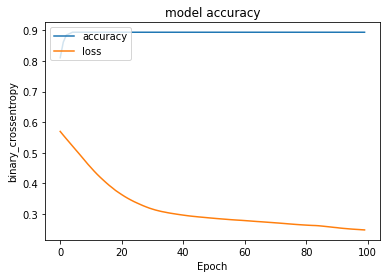

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
#plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('binary_crossentropy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
# plt.legend(['loss'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

In [ ]:
history_test = model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.3875 - accuracy: 0.8280


In [ ]:
history_test

[0.3874599039554596, 0.8279569745063782]

Classification for single class model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

KNN classifier

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.71      0.31      0.43        16
           1       0.87      0.97      0.92        77

    accuracy                           0.86        93
   macro avg       0.79      0.64      0.68        93
weighted avg       0.84      0.86      0.84        93

Accuracy Score: 0.8602150537634409


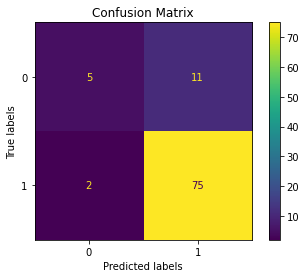

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train,y_train)
y_pred = model_knn.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot()

# Add labels and title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

# Save the figure as a PNG file
plt.savefig("confusion_matrix.png")

# Display the plot
plt.show()

Decision tree classifier


Naive bayes classifier

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.86      0.38      0.52        16
           1       0.88      0.99      0.93        77

    accuracy                           0.88        93
   macro avg       0.87      0.68      0.73        93
weighted avg       0.88      0.88      0.86        93

Accuracy Score: 0.8817204301075269


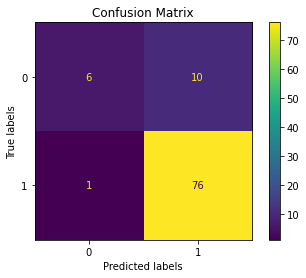

In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train, y_train)

pred_NB = BNB.predict(X_test)
print(classification_report(y_test, pred_NB)) 
print("Accuracy Score:",accuracy_score(y_test,pred_NB))
#print(BNB.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, pred_NB)
# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot()

# Add labels and title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

# Save the figure as a PNG file
plt.savefig("confusion_matrix.png")

# Display the plot
plt.show()

Logistic regression classifier

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.83      0.31      0.45        16
           1       0.87      0.99      0.93        77

    accuracy                           0.87        93
   macro avg       0.85      0.65      0.69        93
weighted avg       0.87      0.87      0.85        93

Accuracy Score: 0.8709677419354839


Text(0.5, 15.0, 'pred_LR')

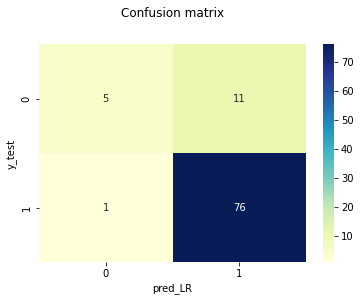

In [ ]:
# Logistic_Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
#print(LR.score(X_test, y_test))
pred_LR = LR.predict(X_test)
print(classification_report(y_test, pred_LR)) 
print("Accuracy Score:",accuracy_score(y_test,pred_LR))
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, pred_LR)
cf_matrix

sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('y_test')
plt.xlabel('pred_LR')


Multiclass

In [ ]:
## multi-class classification with Keras

# load dataset
dataset2 = pd.read_csv('/content/drive/MyDrive/survey lung cancer.csv')
dataset2 = dataset2.drop(columns=['SWALLOWING DIFFICULTY','YELLOW_FINGERS', 'ALCOHOL CONSUMING', 'WHEEZING','GENDER'], axis=1)
X = dataset.iloc[ :,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]].values
y = dataset.iloc[ :, -1].values

# Binarize output label
lb = LabelBinarizer()
y = lb.fit_transform(y)

# encode class values as integers
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

# scaling class values
sc = MinMaxScaler()
X = sc.fit_transform(X)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(y)

# splitting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.2, random_state=0)

# define the keras model
model2 = Sequential()
model2.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dense(8, activation='relu'))

model2.add(Dense(2, activation='softmax'))
# compile the keras model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history2 = model2.fit(X_train,y_train,epochs=200, batch_size=128)

Epoch 1/200
2/2 [==============================] - 1s 9ms/step - loss: 0.5742 - accuracy: 0.7004
Epoch 2/200
2/2 [==============================] - 0s 7ms/step - loss: 0.5633 - accuracy: 0.7085
Epoch 3/200
2/2 [==============================] - 0s 10ms/step - loss: 0.5525 - accuracy: 0.7328
Epoch 4/200
2/2 [==============================] - 0s 10ms/step - loss: 0.5424 - accuracy: 0.7652
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 0.5321 - accuracy: 0.8057
Epoch 6/200
2/2 [==============================] - 0s 9ms/step - loss: 0.5223 - accuracy: 0.8340
Epoch 7/200
2/2 [==============================] - 0s 10ms/step - loss: 0.5130 - accuracy: 0.8340
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 0.5035 - accuracy: 0.8381
Epoch 9/200
2/2 [==============================] - 0s 8ms/step - loss: 0.4944 - accuracy: 0.8381
Epoch 10/200
2/2 [==============================] - 0s 8ms/step - loss: 0.4859 - accuracy: 0.8502
Epoch 11/200
2/2 [========

In [ ]:
#dummy_y = np_utils.to_categorical(y)
#dummy_y

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                132       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________


In [ ]:
acc = history2.history['accuracy']
loss = history2.history['loss']

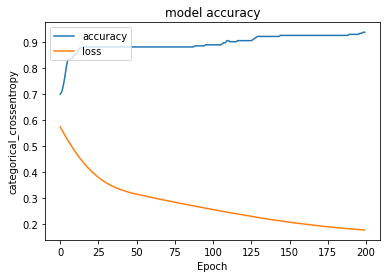

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
#plot training and validation accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['loss'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('categorical_crossentropy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
# plt.legend(['loss'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

In [ ]:
history2_test = model2.evaluate(X_test,y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.3189 - accuracy: 0.8710


Classifier

KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train,y_train)
y_pred = model_knn.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

from sklearn.metrics import multilabel_confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = multilabel_confusion_matrix(y_test, y_pred)
# Create a ConfusionMatrixDisplay object
multilabel_confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
print(cm)


              precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.87      1.00      0.93        52

   micro avg       0.87      0.87      0.87        62
   macro avg       0.93      0.60      0.63        62
weighted avg       0.89      0.87      0.83        62
 samples avg       0.87      0.87      0.87        62

Accuracy Score: 0.8709677419354839
[[[52  0]
  [ 8  2]]

 [[ 2  8]
  [ 0 52]]]


Naive bayes classifer

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import multilabel_confusion_matrix
clf = GaussianNB( )
clf.fit(X_train,y_train.argmax(axis=1))


pred_NB = clf.predict(X_test)
print(classification_report(y_test.argmax(axis=1), pred_NB)) 
print("Accuracy Score:",accuracy_score(y_test.argmax(axis=1),pred_NB))
#print(BNB.score(X_test, y_test))


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
gaussian_cm = multilabel_confusion_matrix(y_test.argmax(axis=1), pred_NB)
# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=gaussian_cm)

print(cm)

              precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.89      0.98      0.94        52

    accuracy                           0.89        62
   macro avg       0.85      0.69      0.73        62
weighted avg       0.88      0.89      0.87        62

Accuracy Score: 0.8870967741935484
[[[52  0]
  [ 8  2]]

 [[ 2  8]
  [ 0 52]]]


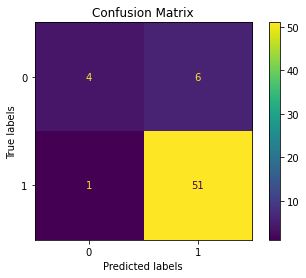

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test.argmax(axis=1), pred_NB)
# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot()

# Add labels and title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

# Save the figure as a PNG file
plt.savefig("confusion_matrix.png")

# Display the plot
plt.show()